In [1]:
# 1. 导入需要的模块和库
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch   #加利福尼亚房屋价值数据集 
import pandas as pd

In [2]:
# 2.导入数据, 探索数据
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.shape

(20640, 8)

In [3]:
y.shape

(20640,)

In [4]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
X.columns = housevalue.feature_names
""" 
MedInc：该街区住户的收入中位数 
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目 
AveBedrms：该街区平均的卧室数目 
Population：街区人口 
AveOccup：平均入住率 
Latitude：街区的纬度 
Longitude：街区的经度
"""

' \nMedInc：该街区住户的收入中位数 \nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目 \nAveBedrms：该街区平均的卧室数目 \nPopulation：街区人口 \nAveOccup：平均入住率 \nLatitude：街区的纬度 \nLongitude：街区的经度\n'

In [7]:
# 3.分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
Xtrain.shape

(14448, 8)

In [8]:
# 4.建模
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [9]:
# 5.探索建好的模型
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [10]:
[*zip(Xtrain.columns, reg.coef_)]
"""
 MedInc：该街区住户的收入中位数 
 HouseAge：该街区房屋使用年代的中位数 
 AveRooms：该街区平均的房间数目 
 AveBedrms：该街区平均的卧室数目 
 Population：街区人口 
 AveOccup：平均入住率 
 Latitude：街区的纬度 
 Longitude：街区的经度
"""

'\n MedInc：该街区住户的收入中位数 \n HouseAge：该街区房屋使用年代的中位数 \n AveRooms：该街区平均的房间数目 \n AveBedrms：该街区平均的卧室数目 \n Population：街区人口 \n AveOccup：平均入住率 \n Latitude：街区的纬度 \n Longitude：街区的经度\n'

In [11]:
reg.intercept_

-36.256893229203946

In [12]:
# 均方误差
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, Ytest)

0.5309012639324573

In [13]:
y.max()

5.00001

In [14]:
y.min()

0.14999

In [15]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [16]:
cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [17]:
# 调用R2
from sklearn.metrics import r2_score
r2_score(yhat, Ytest)
r2 = reg.score(Xtest, Ytest)
r2

0.6043668160178816

In [18]:
# 使用shift table键来检查哪个值先进行输入
r2_score(Ytest, yhat)

0.6043668160178816

In [19]:
# 或者你也可以指定参数, 就不必在意顺序了
r2_score(y_true = Ytest, y_pred = yhat)
cross_val_score(reg, X, y, cv=10, scoring='r2').mean()

0.5110068610524549

In [20]:
# 调用EVS
from sklearn.metrics import explained_variance_score as EVS
EVS(Ytest, yhat)

0.6046102673854399

In [21]:
cross_val_score(reg, X, y, cv=10, scoring='explained_variance')

array([0.54187714, 0.6656149 , 0.47809615, 0.50688473, 0.58687308,
       0.54979333, 0.49559713, 0.4639423 , 0.49176267, 0.60454547])

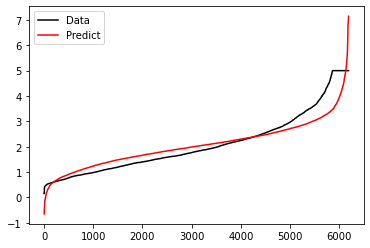

In [22]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)), sorted(Ytest), c='black', label='Data')
plt.plot(range(len(yhat)), sorted(yhat), c='red', label='Predict')
plt.legend()
plt.show()

In [23]:
# 负的R2
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-178.67439293,   -5.76024153,  -15.15035345,  -78.02842185,
        -68.6619674 ])